# 認知症患者との会話を対象とした共起表現ネットワーク作成
<h3>目標：認知症患者が使う語彙・フレーズを特徴を見つけたい。</h3>
<h3>対象：認知症患者(女性、74才)との会話</h3>

<h4>課題：データのクリーニング(動詞や指示語を消す)</h4>
　　　<h4>健常者の対話文も分析する</h4>
   　 <h4>ネットワーク解析</h4>

<h2>ライブラリ読み込み</h2>

In [1]:
import MeCab
import sys
import pandas as pd
import re
import csv
from pathlib import Path
import itertools
import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# 日本語フォント読み込み

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Hiragino Maru Gothic Pro', 'Yu Gothic', 'Meirio', 'Takao', 'IPAexGothic', 'IPAPGothic', 'VL PGothic', 'Noto Sans CJK JP']

# <h1>データ読み込み</h1>

In [3]:
tagger = MeCab.Tagger()
termFreq = {}
file = 'dimentia#3.txt'
with open(file) as f:
    text = f.read()
text = re.sub('二十二歳', '22歳', text)
text = re.sub('十二歳', '22歳', text)
result = tagger.parse(text)
result

'彼女\t名詞,代名詞,一般,*,*,*,彼女,カノジョ,カノジョ\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\n最近\t名詞,副詞可能,*,*,*,*,最近,サイキン,サイキン\nでし\t助動詞,*,*,*,特殊・デス,連用形,です,デシ,デシ\nた\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ\n。\t記号,句点,*,*,*,*,。,。,。\nそう\t副詞,助詞類接続,*,*,*,*,そう,ソウ,ソー\n。\t記号,句点,*,*,*,*,。,。,。\nでき\t動詞,自立,*,*,一段,連用形,できる,デキ,デキ\nた\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ\nなう\t形容詞,自立,*,*,形容詞・アウオ段,連用ゴザイ接続,ない,ナウ,ナー\n顔\t名詞,一般,*,*,*,*,顔,カオ,カオ\nが\t助詞,格助詞,一般,*,*,*,が,ガ,ガ\nでき\t動詞,自立,*,*,一段,連用形,できる,デキ,デキ\nて\t動詞,非自立,*,*,一段,未然形,てる,テ,テ\nない\t助動詞,*,*,*,特殊・ナイ,基本形,ない,ナイ,ナイ\nん\t名詞,非自立,一般,*,*,*,ん,ン,ン\nで\t助動詞,*,*,*,特殊・ダ,連用形,だ,デ,デ\nは\t助詞,係助詞,*,*,*,*,は,ハ,ワ\nまだ\t副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ\nだ\t助動詞,*,*,*,特殊・ダ,基本形,だ,ダ,ダ\nよ\t助詞,終助詞,*,*,*,*,よ,ヨ,ヨ\nまだ\t副詞,助詞類接続,*,*,*,*,まだ,マダ,マダ\n若い\t形容詞,自立,*,*,形容詞・アウオ段,基本形,若い,ワカイ,ワカイ\n22\t名詞,数,*,*,*,*,*\n歳\t名詞,接尾,助数詞,*,*,*,歳,サイ,サイ\nだ\t助動詞,*,*,*,特殊・ダ,基本形,だ,ダ,ダ\nから\t助詞,接続助詞,*,*,*,*,から,カラ,カラ\n。\t記号,句点,*,*,*,*,。,。,。\nうん\t感動詞,*,*,*,*,*,うん,ウン,ウン\n。\t記号,句点,*,*,*,*,。,。,。\n行っ\t動詞,自立,*,*,五段・ワ行促音便,連用タ接続,行う,オコナッ,オコナッ\nた\t助動詞,*,*,*,特殊・タ,基本形,た,タ,タ\nん\t名詞,非自立,一般,*,*,*,ん,ン,

In [12]:
lines = result.split('\n')
words = []#「名詞」と「動詞」を格納するリスト
for line in lines:
    feature = line.split('\t')
    if len(feature) == 2: #'EOS'と''を省く
        info = feature[1].split(',')
        hinshi = info[0]
        if hinshi in ('名詞'):
            if info[6] != '*' :
                if info[6] != 'ん':
                    if info[6] != 'こと':
                        if info[6] != 'どこ':
                            if info[6] != '何':
                                words.append(info[6])
            

words
        
        

ngram_list = ([(words[i], words[i+1]) for i in range(len(words)-1)])
for n_word in ngram_list:
        if n_word in termFreq:
            termFreq[n_word] += 1
        else:
            termFreq[n_word] = 1
  
            
term_list = []
count_list = []
for term, count in termFreq.items():
    term_list.append(term)
    count_list.append(count)

s = pd.DataFrame({
 'Count':count_list,
 'List':term_list
 })

s = s.sort_values('Count', ascending=False)
# pd.get_option("display.max_rows", 2000)
# s.head(60)


    
# print(ngram_list)

In [13]:
target_combinations = []
target_combinations.extend(ngram_list)
combi_count = collections.Counter(target_combinations)
word_associates = []
for key, value in combi_count.items():
    word_associates.append([key[0], key[1], value])
word_associates = pd.DataFrame(word_associates, columns=['word1', 'word2', 'intersection_count'])

#  和集合の計算 n(A ∪ B) = n(A) + n(B) - n(A ∩ B) を利用
#  それぞれの単語の出現回数を計算
target_words = []
for word in target_combinations:
    target_words.extend(word)

word_count = collections.Counter(target_words)
word_count = [[key, value] for key, value in word_count.items()]
word_count = pd.DataFrame(word_count, columns=['word', 'count'])

#  単語の組合せの出現回数のデータにそれぞれの単語の出現回数を結合
word_associates = pd.merge(word_associates, word_count, left_on='word1', right_on='word', how='left')
word_associates.drop(columns=['word'], inplace=True)
word_associates.rename(columns={'count': 'count1'}, inplace=True)
word_associates = pd.merge(word_associates, word_count, left_on='word2', right_on='word', how='left')
word_associates.drop(columns=['word'], inplace=True)
word_associates.rename(columns={'count': 'count2'}, inplace=True)

word_associates['union_count'] = word_associates['count1'] + word_associates['count2'] - word_associates['intersection_count']
word_associates['jaccard_coefficient'] = word_associates['intersection_count'] / word_associates['union_count']

print('Jaccard係数の算出')
word_associates.head(60)

Jaccard係数の算出


,word1,word2,intersection_count,count1,count2,union_count,jaccard_coefficient
0,彼女,最近,1,5,6,10,0.100000
1,最近,顔,1,6,2,7,0.142857
2,顔,歳,1,2,6,7,0.142857
3,歳,歳,1,6,6,11,0.090909
4,歳,時,2,6,10,14,0.142857
5,時,子供,2,10,8,16,0.125000
6,子供,みんな,1,8,8,15,0.066667
7,みんな,たくさん,1,8,2,9,0.111111
8,たくさん,関係,1,2,2,3,0.333333
9,関係,歳,1,2,6,7,0.142857


In [7]:
u = word_associates['word1'].unique().tolist()
termFreq = {}
for label in u:
    df_1 = word_associates[word_associates['word1'] == label]
    termFreq[label] = len(df_1)

term_list = []
count_list = []
for term, count in termFreq.items():
    term_list.append(term)
    count_list.append(count)

s = pd.DataFrame({
 'Count':count_list,
 'List':term_list
 })

s = s.sort_values('Count', ascending=False)
pd.get_option("display.max_rows", 2000)
s



,Count,List
9,14,人
37,6,今
14,6,私
64,5,好き
39,5,自分
...,...,...
89,1,お金
92,1,貧乏
93,1,日本
94,1,大体


In [14]:
s.mean()

Count    1.237548
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a166062d0>]],
      dtype=object)

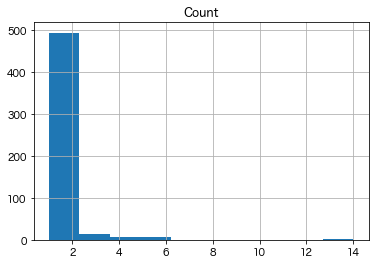

In [15]:
s.hist()

In [19]:
len(s)

522

In [16]:
word_associates['jaccard_coefficient'].max()

0.3333333333333333

In [17]:
len(word_associates)

322

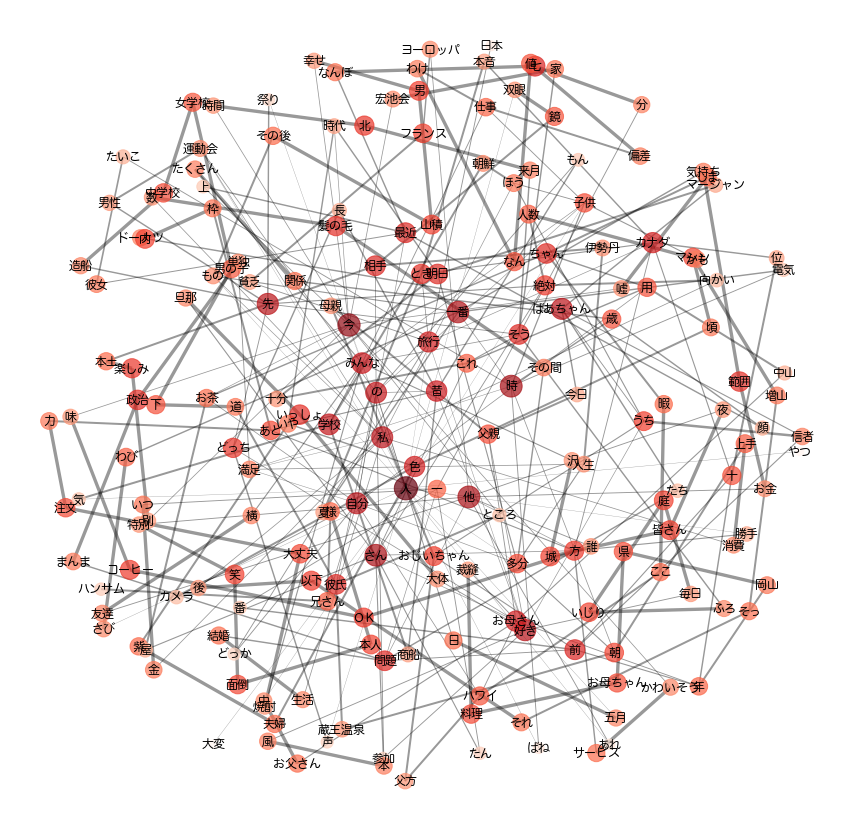

In [18]:
n_word_lower = 1
edge_threshold = 0.01

word_associates.query('count1 >= @n_word_lower & count2 >= @n_word_lower', inplace=True)
word_associates.rename(columns={'word1':'node1', 'word2':'node2', 'jaccard_coefficient':'value'}, inplace=True)

##  共起ネットワークを表示する関数
def plot_network(data, edge_threshold=0., fig_size=(15, 15), file_name=None, dir_path=None):

    nodes = list(set(data['node1'].tolist()+data['node2'].tolist()))

    G = nx.Graph()
    #  頂点の追加
    G.add_nodes_from(nodes)

    #  辺の追加
    #  edge_thresholdで枝の重みの下限を定めている
    for i in range(len(data)):
        row_data = data.iloc[i]
        if row_data['value'] > edge_threshold:
            G.add_edge(row_data['node1'], row_data['node2'], weight=row_data['value'])

    # 孤立したnodeを削除
    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
    for n in isolated:
        G.remove_node(n)

    plt.figure(figsize=fig_size)
    pos = nx.spring_layout(G, k=0.3)  # k = node間反発係数

    pr = nx.pagerank(G)

    # nodeの大きさ
    nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()),
                           cmap=plt.cm.Reds,
                           alpha=0.7,
                           node_size=[60000*v for v in pr.values()])

    # 日本語ラベル
    nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Hiragino Maru Gothic Pro', font_weight="bold")

    # エッジの太さ調節
    edge_width = [d["weight"] * 10 for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="black", width=edge_width)

    plt.axis('off')

    if file_name is not None:
        if dir_path is None:
            dir_path = Path('.').joinpath('image')
        if not dir_path.exists():
            dir_path.mkdir(parents=True)
        plt.savefig(dir_path.joinpath(file_name), bbox_inches="tight")
        
plot_network(data=word_associates, edge_threshold=edge_threshold)

In [33]:
for n_word in ngram_list:
    if n_word in termFreq:
        termFreq[n_word] += 1
    else:
        termFreq[n_word] = 1
            
#     for word in words:
#         if word in termFreq:
#             termFreq[word] += 1
#         else:
#             termFreq[word] = 1
            
#     sentences.append(words)
    
# sentences = [sentence for sentence in sentences if len(sentence) > 1]
# sentence_combinations = [list(itertools.combinations(sentence, 2)) for sentence in sentences]
# sentence_combinations = [[tuple(sorted(words)) for words in sentence] for sentence in sentence_combinations]
# print('単語の組合せ')
# for combinations in sentence_combinations[:20]:
#     print(combinations)
    

In [34]:
term_list = []
count_list = []
for term, count in termFreq.items():
    term_list.append(term)
    count_list.append(count)

s = pd.DataFrame({
 'Count':count_list,
 'List':term_list
 })

s = s.sort_values('Count', ascending=False)

In [35]:
pd.get_option("display.max_rows", 2000)
s.head(60)

,Count,List
80,16,"(好き, な)"
346,15,"(し, てる)"
492,14,"(て, た)"
542,14,"(結婚, し)"
169,12,"(た, です)"
168,12,"(あっ, た)"
857,12,"(そう, だ)"
616,11,"(楽しかっ, た)"
198,11,"(こと, ない)"
77,10,"(はい, はい)"


# 単語間の重みを測定
<h2>Jaccard係数=n(A∩B)/n(A∪B)を使う</h2>

In [36]:
target_combinations = []
for sentence in sentence_combinations:
    target_combinations.extend(sentence)

##------------------------------------  Jaccard係数を求める
# Jaccard係数 = n(A ∩ B) / n(A ∪ B)

#  直積の計算（同じ文内にある２つの単語の出現回数を計算）
combi_count = collections.Counter(target_combinations)

#  単語の組合せと出現回数のデータフレームを作る
word_associates = []
for key, value in combi_count.items():
    word_associates.append([key[0], key[1], value])

word_associates = pd.DataFrame(word_associates, columns=['word1', 'word2', 'intersection_count'])

#  和集合の計算 n(A ∪ B) = n(A) + n(B) - n(A ∩ B) を利用
#  それぞれの単語の出現回数を計算
target_words = []
for word in target_combinations:
    target_words.extend(word)

word_count = collections.Counter(target_words)
word_count = [[key, value] for key, value in word_count.items()]
word_count = pd.DataFrame(word_count, columns=['word', 'count'])

#  単語の組合せの出現回数のデータにそれぞれの単語の出現回数を結合
word_associates = pd.merge(word_associates, word_count, left_on='word1', right_on='word', how='left')
word_associates.drop(columns=['word'], inplace=True)
word_associates.rename(columns={'count': 'count1'}, inplace=True)
word_associates = pd.merge(word_associates, word_count, left_on='word2', right_on='word', how='left')
word_associates.drop(columns=['word'], inplace=True)
word_associates.rename(columns={'count': 'count2'}, inplace=True)

word_associates['union_count'] = word_associates['count1'] + word_associates['count2'] - word_associates['intersection_count']
word_associates['jaccard_coefficient'] = word_associates['intersection_count'] / word_associates['union_count']

print('Jaccard係数の算出')
word_associates.head(60)

Jaccard係数の算出


,word1,word2,intersection_count,count1,count2,union_count,jaccard_coefficient
0,ある,うち,2,132,57,187,0.010695
1,上がる,明日,2,10,59,67,0.029851
2,え,明日,2,206,59,263,0.007605
3,小さい,明日,2,20,59,77,0.025974
4,明日,見,2,59,52,109,0.018349
5,たん,明日,2,25,59,82,0.024390
6,え,上がる,2,206,10,214,0.009346
7,上がる,小さい,2,10,20,28,0.071429
8,上がる,見,2,10,52,60,0.033333
9,たん,上がる,2,25,10,33,0.060606


   group_number  word2
0             0   2339
1             1   2786
2             2   1417
3             3    954
4             4   2266



/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Applications/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


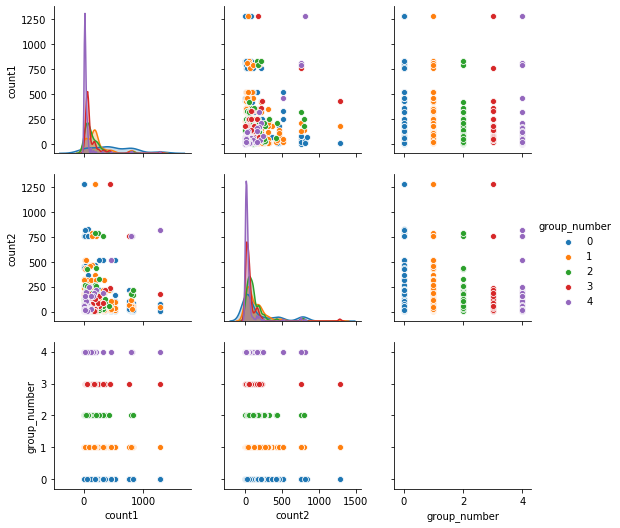

In [10]:
jaccard_coefficients = word_associates['jaccard_coefficient']
group_numbers = []
for coefficient in jaccard_coefficients:
    if coefficient < 0.003:
        group_numbers.append(0)
    elif coefficient < 0.006:
        group_numbers.append(1)
    elif coefficient < 0.009:
        group_numbers.append(2)
    elif coefficient < 0.012:
        group_numbers.append(3)
    else:
        group_numbers.append(4)
word_associates['group_number'] = group_numbers

word_associates_group_sum = word_associates.groupby('group_number').count()
word_associates_group_sum.reset_index(inplace=True)
print(word_associates_group_sum.loc[:, ['group_number', 'word2']])
print('')

sns.pairplot(hue='group_number', data=word_associates.sample(800).loc[:, ['count1', 'count2', 'group_number']])
# plt.savefig(image_dir_path.joinpath(base_file_name+'_jaccard_group_plot.png'))

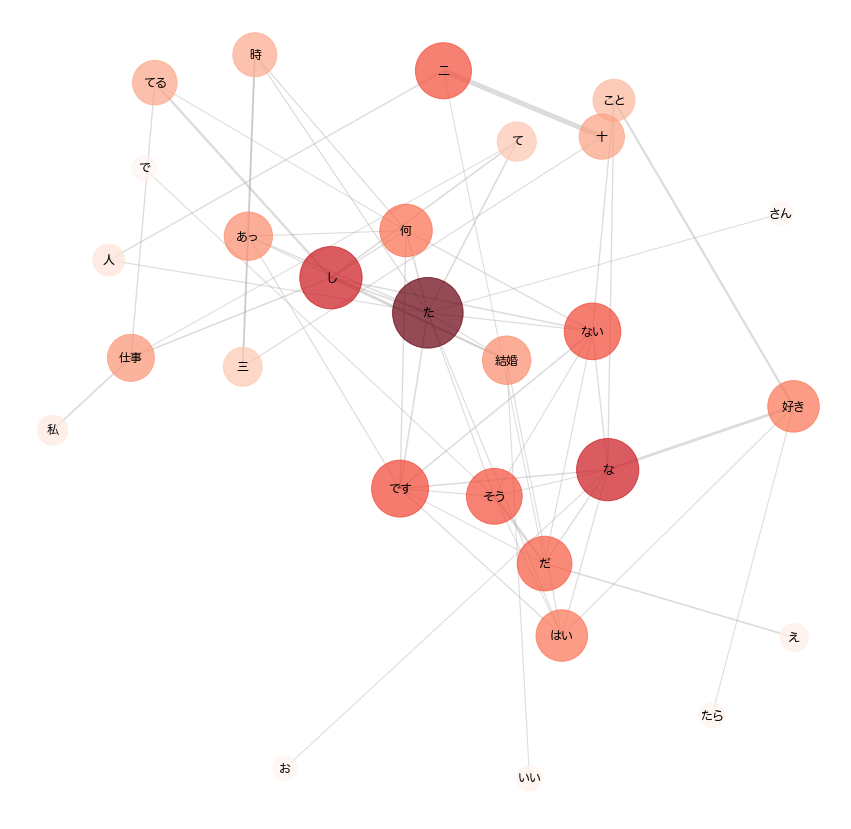

In [29]:
n_word_lower = 20
edge_threshold = 0.01

word_associates.query('count1 >= @n_word_lower & count2 >= @n_word_lower', inplace=True)
word_associates.rename(columns={'word1':'node1', 'word2':'node2', 'jaccard_coefficient':'value'}, inplace=True)

##  共起ネットワークを表示する関数
def plot_network(data, edge_threshold=0., fig_size=(15, 15), file_name=None, dir_path=None):

    nodes = list(set(data['node1'].tolist()+data['node2'].tolist()))

    G = nx.Graph()
    #  頂点の追加
    G.add_nodes_from(nodes)

    #  辺の追加
    #  edge_thresholdで枝の重みの下限を定めている
    for i in range(len(data)):
        row_data = data.iloc[i]
        if row_data['value'] > edge_threshold:
            G.add_edge(row_data['node1'], row_data['node2'], weight=row_data['value'])

    # 孤立したnodeを削除
    isolated = [n for n in G.nodes if len([i for i in nx.all_neighbors(G, n)]) == 0]
    for n in isolated:
        G.remove_node(n)

    plt.figure(figsize=fig_size)
    pos = nx.spring_layout(G, k=0.3)  # k = node間反発係数

    pr = nx.pagerank(G)

    # nodeの大きさ
    nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()),
                           cmap=plt.cm.Reds,
                           alpha=0.7,
                           node_size=[60000*v for v in pr.values()])

    # 日本語ラベル
    nx.draw_networkx_labels(G, pos, fontsize=14, font_family='Hiragino Maru Gothic Pro', font_weight="bold")

    # エッジの太さ調節
    edge_width = [d["weight"] * 100 for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_edges(G, pos, alpha=0.4, edge_color="darkgrey", width=edge_width)

    plt.axis('off')

    if file_name is not None:
        if dir_path is None:
            dir_path = Path('.').joinpath('image')
        if not dir_path.exists():
            dir_path.mkdir(parents=True)
        plt.savefig(dir_path.joinpath(file_name), bbox_inches="tight")
        
plot_network(data=word_associates, edge_threshold=edge_threshold)